In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor
import torch.optim as optim
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [3]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=ToTensor())

/home/aman.satyawali/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
batchSize = 16
trainLoader = DataLoader(dataset=mnist_trainset, batch_size=batchSize, shuffle=True)
testLoader = DataLoader(dataset=mnist_testset, batch_size=batchSize, shuffle=True)

In [5]:
print(len(mnist_trainset))
print(len(mnist_testset))

60000
10000


In [14]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 12, 5, stride=1)
        self.conv2 = nn.Conv2d(12, 12, 5, stride=1, padding = 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(588, 200)  # 5*5 from image dimension
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 10)
        
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def predict(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        ans = torch.empty(x.shape[0])
        for index in range(len(ans)) : 
            ans[index] = torch.argmax(x[index])
        return ans
    
    def test(self, x):
        # Max pooling over a (2, 2) window
        print('Shape of input : ', x.shape)
        x = self.conv1(x)
        print('Shape after first convolution : ', x.shape)
        x = F.relu(x)
        print('Shape after relu : ', x.shape)
        x = F.max_pool2d(x, (2, 2))
        print('Shape after first pooling : ', x.shape)
        # If the size is a square, you can specify with a single number
        x = self.conv2(x)
        print('Shape after second convolution : ', x.shape)
        x = F.relu(x)
        print('Shape after second relu : ', x.shape)
        x = F.max_pool2d(x, 2)
        print('Shape after second pooling : ', x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        print('Shape after flattening : ', x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        ans = torch.empty(x.shape[0])
        for index in range(len(ans)) : 
            ans[index] = torch.argmax(x[index])
        return ans

In [15]:
model = Net()

In [16]:
index = 1


randomDataPoint = mnist_testset.__getitem__(index)[0]

model.test(randomDataPoint.reshape(1, 1, 28, 28))

Shape of input :  torch.Size([1, 1, 28, 28])
Shape after first convolution :  torch.Size([1, 12, 24, 24])
Shape after relu :  torch.Size([1, 12, 24, 24])
Shape after first pooling :  torch.Size([1, 12, 12, 12])
Shape after second convolution :  torch.Size([1, 12, 14, 14])
Shape after second relu :  torch.Size([1, 12, 14, 14])
Shape after second pooling :  torch.Size([1, 12, 7, 7])
Shape after flattening :  torch.Size([1, 588])


tensor([9.])

In [17]:
def makeTrainStep(model, optimizer, lossFn) :
    
    def trainStep (xTrain, yTrain) :
        model.train()
        yPred = model(xTrain)
        loss = lossFn(yPred, yTrain)
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()
        return loss.detach()
        
    return trainStep        

<h3>Learning rate = 0.01</h3>

In [ ]:
losses = []

In [69]:
nEpochs = 100
learningRate = 0.01
lossFn = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=learningRate)

trainingStep = makeTrainStep(model, optimizer, lossFn)

for epoch in range(nEpochs) : 
    print('Pass : ', epoch + 1, ' of ', nEpochs)
    runningLoss = torch.zeros(1)
    for i, data in enumerate(trainLoader, 0):
        xBatch, yBatch = data
        loss = trainingStep(xBatch, yBatch)
        runningLoss += loss.item()
    losses.append(torch.log(runningLoss))

Pass :  1  of  100
Pass :  2  of  100
Pass :  3  of  100
Pass :  4  of  100
Pass :  5  of  100
Pass :  6  of  100
Pass :  7  of  100
Pass :  8  of  100
Pass :  9  of  100
Pass :  10  of  100
Pass :  11  of  100
Pass :  12  of  100
Pass :  13  of  100
Pass :  14  of  100
Pass :  15  of  100
Pass :  16  of  100
Pass :  17  of  100
Pass :  18  of  100
Pass :  19  of  100
Pass :  20  of  100
Pass :  21  of  100
Pass :  22  of  100
Pass :  23  of  100
Pass :  24  of  100
Pass :  25  of  100
Pass :  26  of  100
Pass :  27  of  100
Pass :  28  of  100
Pass :  29  of  100
Pass :  30  of  100
Pass :  31  of  100
Pass :  32  of  100
Pass :  33  of  100
Pass :  34  of  100
Pass :  35  of  100
Pass :  36  of  100
Pass :  37  of  100
Pass :  38  of  100
Pass :  39  of  100
Pass :  40  of  100
Pass :  41  of  100
Pass :  42  of  100
Pass :  43  of  100
Pass :  44  of  100
Pass :  45  of  100
Pass :  46  of  100
Pass :  47  of  100
Pass :  48  of  100
Pass :  49  of  100
Pass :  50  of  100
Pass :  5

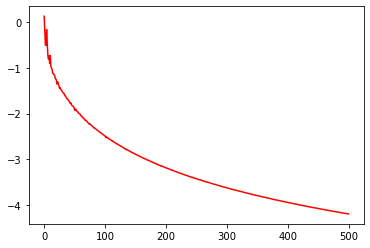

In [71]:
plt.plot(losses, color = 'red')

In [72]:
totalPredictions = 0
correctPredictions = 0
wrongPred1 = []
model.eval()
for xTestBatch, yTestBatch in testLoader :
    yPred = model.predict(xTestBatch)
    correctPredictions += torch.eq(yPred, yTestBatch).sum()
    
    for i, sample in enumerate(yPred, 0) : 
        if(yPred[i] != yTestBatch[i]) :
            wrongPred1.append({'image' : xTestBatch[i][0], 'answer' : yTestBatch[i], 'pred' : yPred[i]})
    totalPredictions += batchSize
print('Accuracy : ', correctPredictions/totalPredictions)


Accuracy :  tensor(0.9912)


Answer :  tensor(3)
Predic :  tensor(5.)


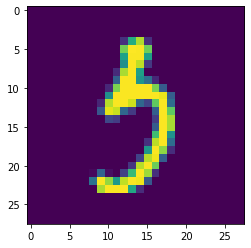

In [73]:
i = 9
plt.imshow(wrongPred1[i]['image'])
print('Answer : ', wrongPred1[i]['answer'])
print('Predic : ', wrongPred1[i]['pred'])

In [ ]:
PATH = 'savedModels/' + datetime.now().strftime("%Y_%m_%d-%H:%M:%S") + '.pth'
torch.save({'params' : model.state_dict(), 'losses' : }, PATH)

NameError: name 'plt' is not defined